In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(data.shape)
data.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
data.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [4]:
list(data.columns.values)

['Customer',
 'State',
 'Customer Lifetime Value',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size']

In [5]:
#Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)
data.columns = data.columns.str.lower()
data.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
data.columns = data.columns.str.lower().str.replace('[^0-9a-zA-Z]+','_',regex=True)
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [7]:
#Change effective to date column to datetime format.

In [8]:
data['effective_to_date'].head()

0    2/24/11
1    1/31/11
2    2/19/11
3    1/20/11
4     2/3/11
Name: effective_to_date, dtype: object

In [9]:
import datetime
data['effective_to_date']= pd.to_datetime(data['effective_to_date'])
data['effective_to_date'].head()

0   2011-02-24
1   2011-01-31
2   2011-02-19
3   2011-01-20
4   2011-02-03
Name: effective_to_date, dtype: datetime64[ns]

In [10]:
#Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df
continuous_df = data.select_dtypes(include = float)
display(continuous_df)
discrete_df = data.select_dtypes(include = int)
discrete_df

,customer_lifetime_value,total_claim_amount
0,2763.519279,384.811147
1,6979.535903,1131.464935
2,12887.431650,566.472247
3,7645.861827,529.881344
4,2813.692575,138.130879
...,...,...
9129,23405.987980,198.234764
9130,3096.511217,379.200000
9131,8163.890428,790.784983
9132,7524.442436,691.200000


,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,56274,69,32,5,0,1
1,0,94,13,42,0,8
2,48767,108,18,38,0,2
3,0,106,18,65,0,7
4,43836,73,12,44,0,1
...,...,...,...,...,...,...
9129,71941,73,18,89,0,2
9130,21604,79,14,28,0,1
9131,0,85,9,37,3,2
9132,21941,96,34,3,0,3


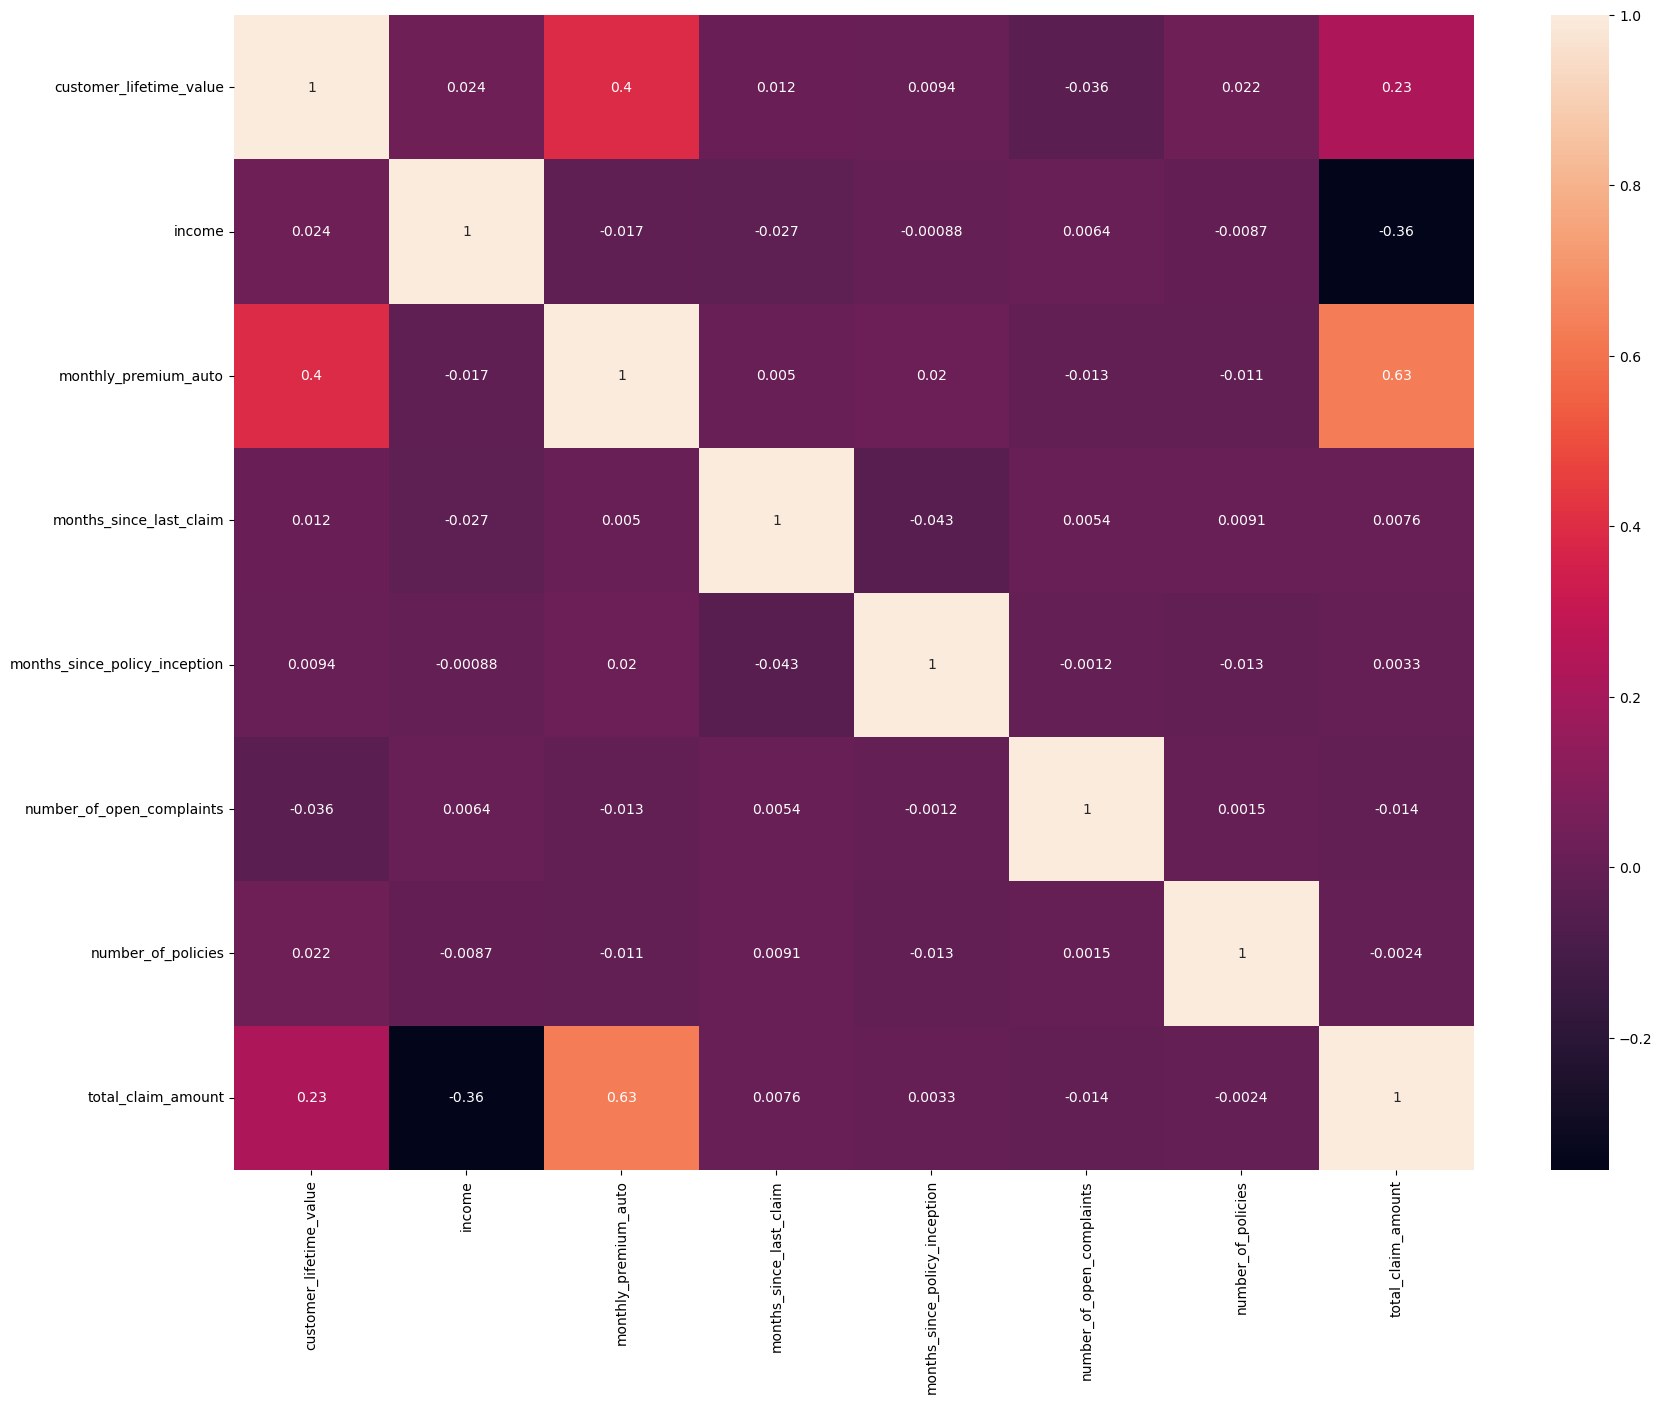

In [11]:
#Plot a correlation matrix, comment what you see. // We see low correlations between de values.
plt.figure(figsize = (20,15))
correlations_matrix = data.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [12]:
#Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

In [13]:
numerical = data.select_dtypes(include=np.number)
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [14]:
for col in numerical:
    print(len(numerical[col].unique()))
    

8041
5694
202
36
100
6
9
5106


In [15]:
discrete_list = []
continuous_list = []
for col in numerical.columns:
    if len(numerical[col].unique()) < (data.shape[0] * 0.03):
        discrete_list.append(col)
    else:
        continuous_list.append(col)
display(discrete_list)
display(continuous_list)

['monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies']

['customer_lifetime_value', 'income', 'total_claim_amount']

In [16]:
def c_d_dif(df):
    discrete_list = []
    continuous_list = []
    for col in df.columns:
        if len(df[col].unique()) < (data.shape[0] * 0.03):
            discrete_list.append(col)
        else:
            continuous_list.append(col)
    return discrete_list, continuous_list

In [17]:
discrete_list,continuous_list = c_d_dif(numerical)

In [18]:
discrete_list

['monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies']

In [19]:
continuous_list

['customer_lifetime_value', 'income', 'total_claim_amount']

In [20]:
discrete_df = numerical[discrete_list]
discrete_df

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,69,32,5,0,1
1,94,13,42,0,8
2,108,18,38,0,2
3,106,18,65,0,7
4,73,12,44,0,1
...,...,...,...,...,...
9129,73,18,89,0,2
9130,79,14,28,0,1
9131,85,9,37,3,2
9132,96,34,3,0,3


In [21]:
continuous_df = numerical[continuous_list]
continuous_df

,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879
...,...,...,...
9129,23405.987980,71941,198.234764
9130,3096.511217,21604,379.200000
9131,8163.890428,0,790.784983
9132,7524.442436,21941,691.200000


In [22]:
#Comment what you can see in the plots// We can observe outliers in the discrete variables as 
#monthly_premium_auto and in continuous variables as customer_lifetime_value, income and total_claim_amount.

/Users/matiasgroblunecke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


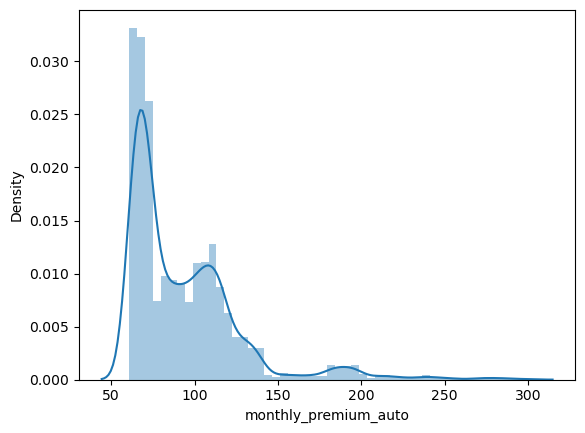

/Users/matiasgroblunecke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


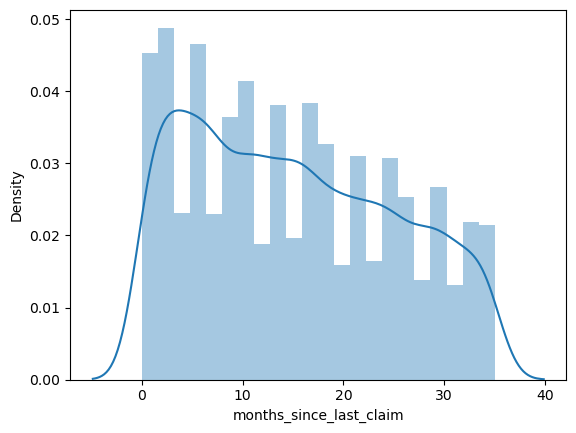

/Users/matiasgroblunecke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


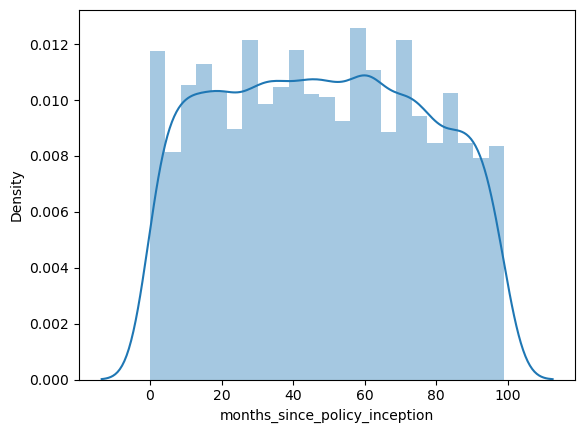

/Users/matiasgroblunecke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


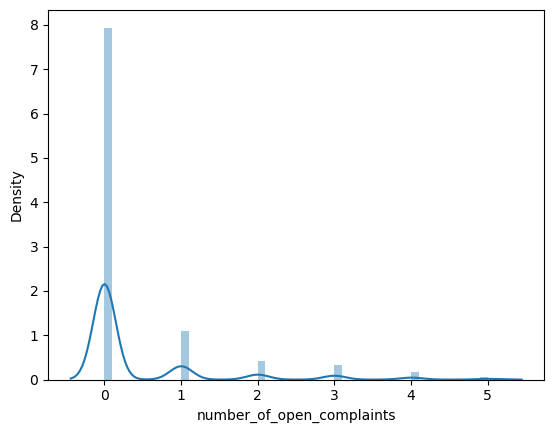

/Users/matiasgroblunecke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


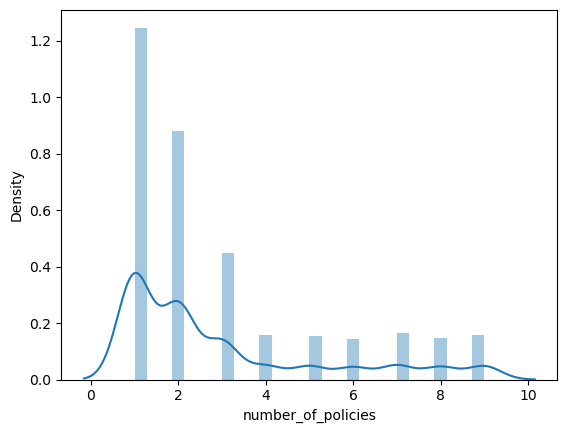

In [23]:
for column in numerical[discrete_list]:
    sns.distplot(numerical[column])
    plt.show()

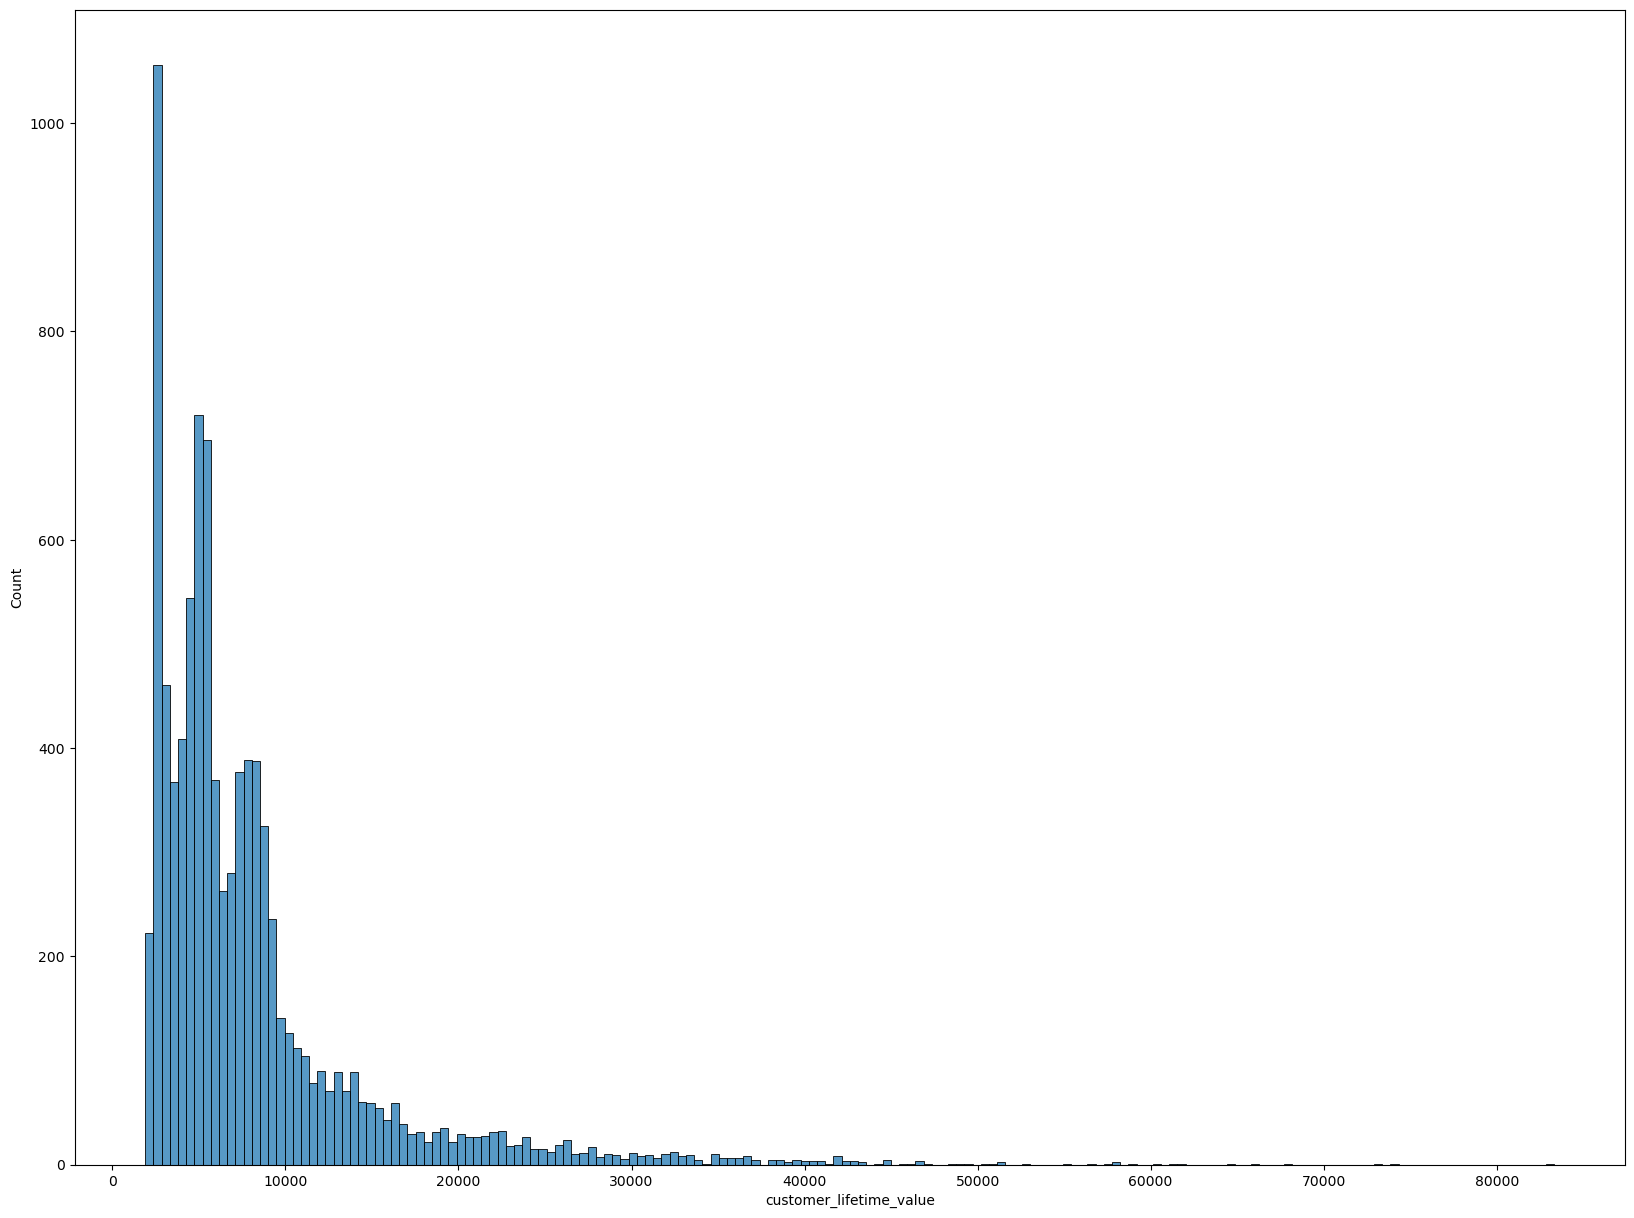

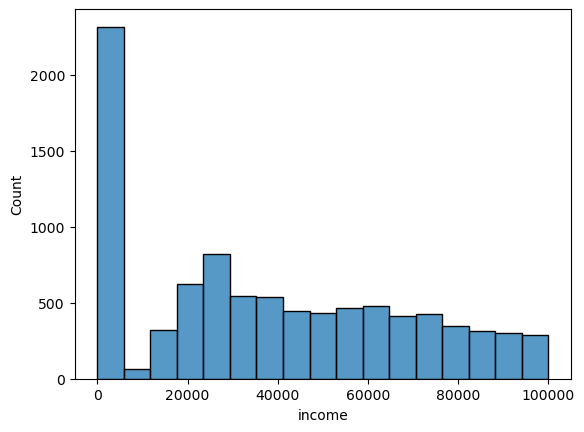

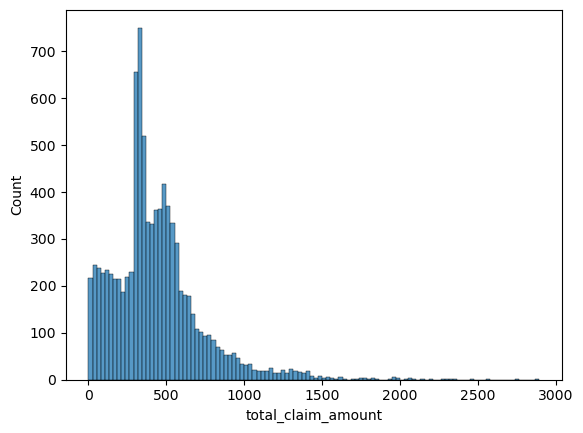

In [24]:
plt.figure(figsize = (20,15))
for column in numerical[continuous_list]:
    sns.histplot(numerical[column])
    plt.show()

In [25]:
#Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)
#Did you find outliers? Comment what you will do with them 

In [26]:
#We can observe outliers in the discrete variables as monthly_premium_auto and in continuous variables as customer_lifetime_value, income and total_claim_amount.
# We could extract them using the upper_limmit and lower limmit (iqr), defining our new ranges without outliers.

/Users/matiasgroblunecke/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


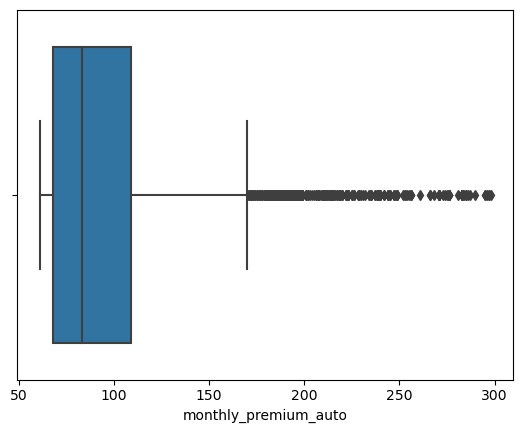

In [27]:
sns.boxplot(numerical["monthly_premium_auto"])
plt.show()

/Users/matiasgroblunecke/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


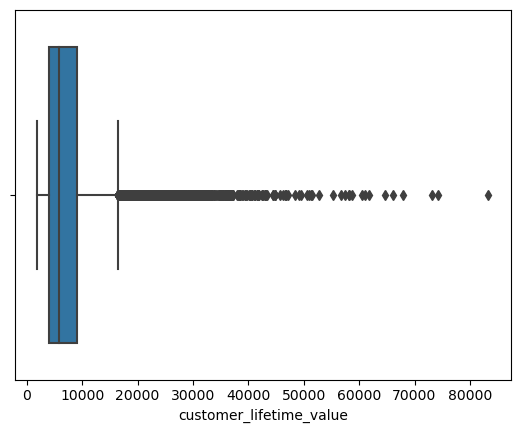

/Users/matiasgroblunecke/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


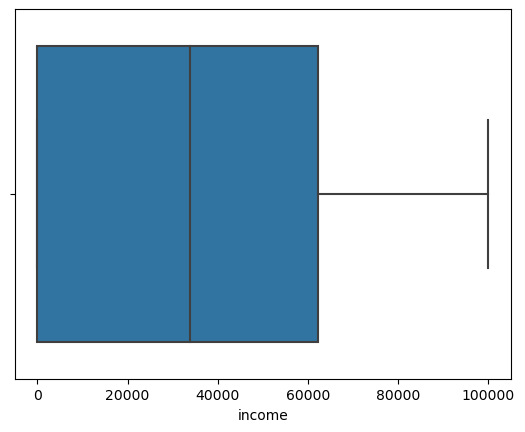

/Users/matiasgroblunecke/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


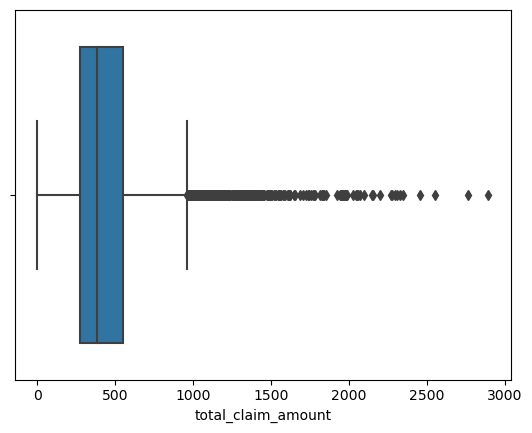

In [28]:
for column in numerical[continuous_list]:
    sns.boxplot(numerical[column])
    plt.show()

In [29]:
#Check all columns for NaN values. Decide what (if anything) you will need to do with them.

In [30]:
data.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [31]:
# No NaN values.

In [32]:
#Find all of the categorical data. Save it in a categorical_df variable.

categorical_df = data.select_dtypes(include = object)
categorical_df.head()

#Check for NaN values.
#No NaN values

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [33]:
#Check all unique values of columns.
for col in categorical_df:
    print(len(categorical_df[col].unique()))

9134
5
2
3
5
5
2
3
3
3
9
4
4
6
3


In [34]:
#Check dtypes. Do they all make sense as categorical data? // Yes, they all make sense but we could convert some into numerical
#Response, marital_status and policy_type.
categorical_df.dtypes

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

In [35]:
#Does any column contain alpha and numeric data? Decide how to clean it.
#some of the categoricals columns don't make sense, some have Numerical values : 'Policy', Renew Offer Type' and 'policy_type'
#we decide to change 'renew_offer_type' and 'policy' in order to have a full categorical columns.
#Offer1 to Offer A and Corporate L1 to Corporate



In [36]:
#Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.
#some of the categoricals columns don't make sense, some have Numerical values : 'Policy', Renew Offer Type' and 'policy_type'
#we decide to change 'renew_offer_type' and 'policy' in order to have a full categorical columns.
#Offer1 to Offer A and Corporate L1 to Corporate





In [37]:
#Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?
# We are dropping policy because it doesn´t provide us with new information and keeping policy type.
categorical_df1 = categorical_df.drop(["policy","customer"],axis=1)
categorical_df1



,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Offer3,Branch,Four-Door Car,Large


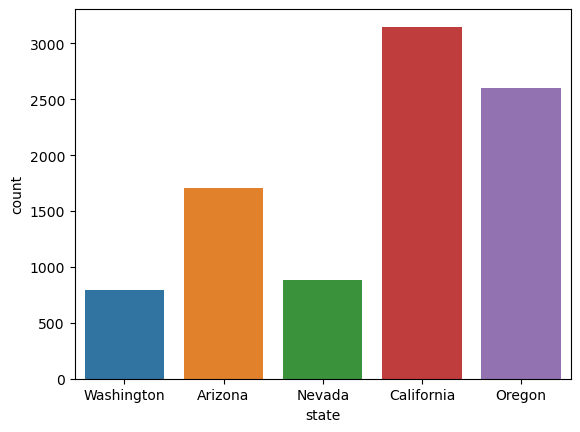

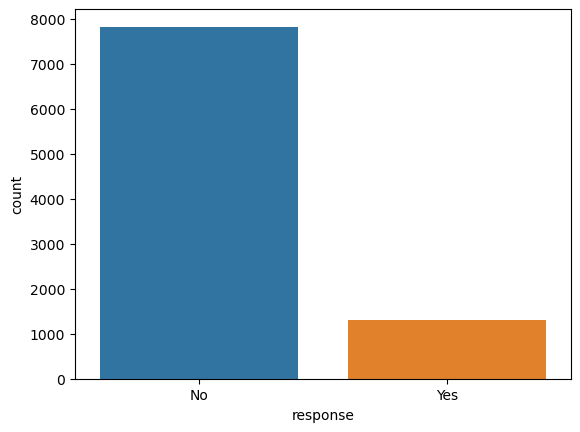

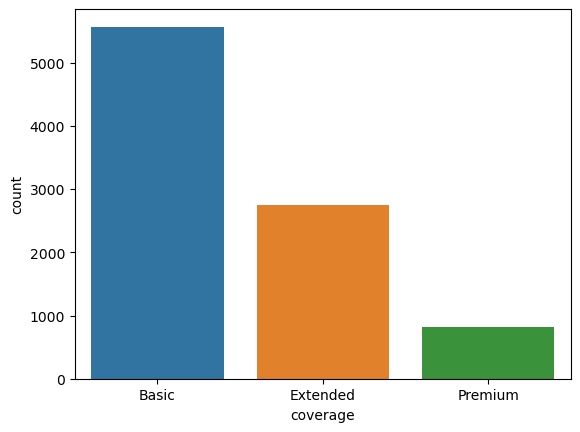

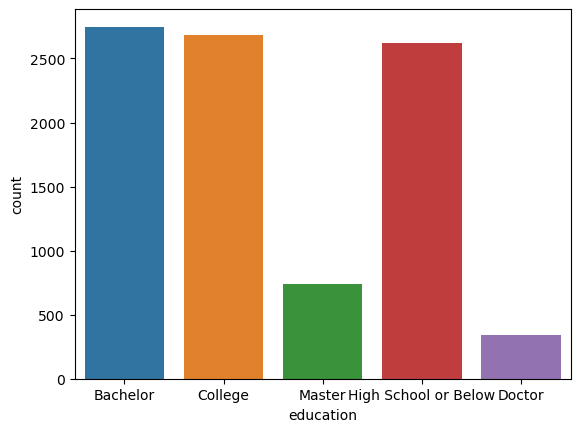

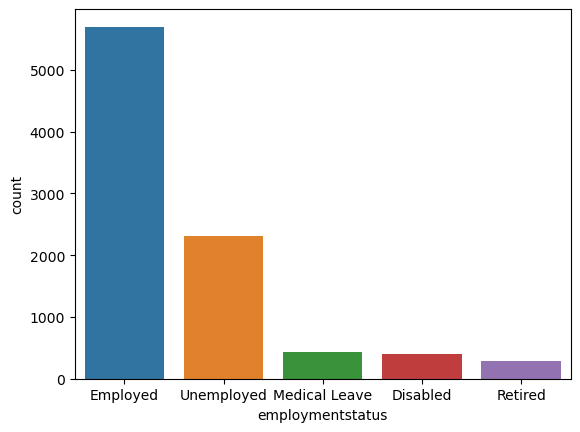

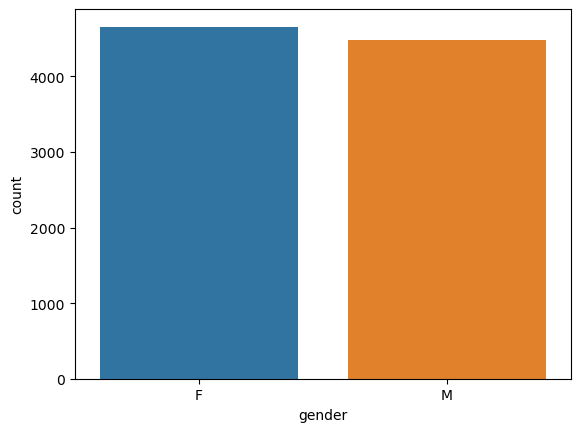

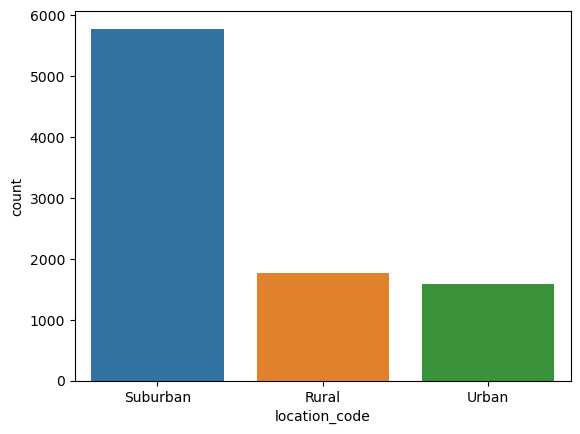

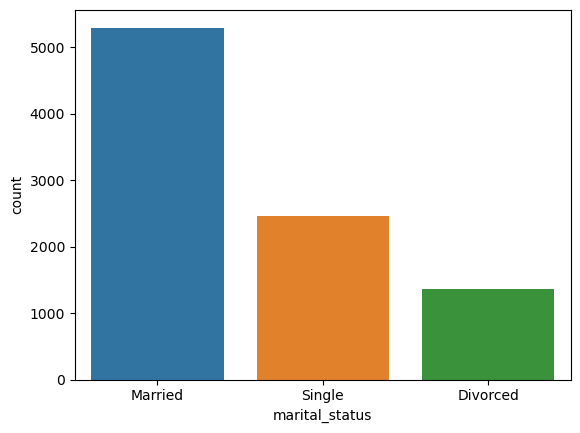

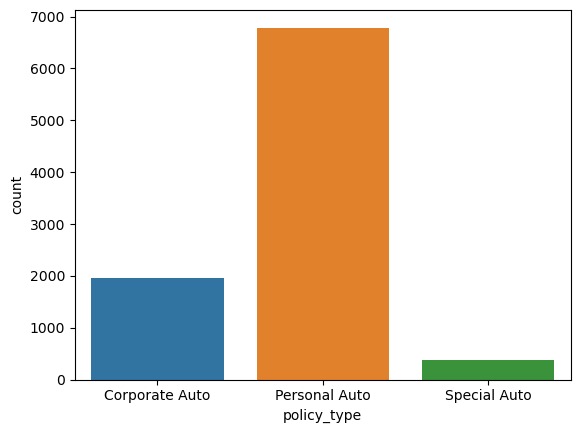

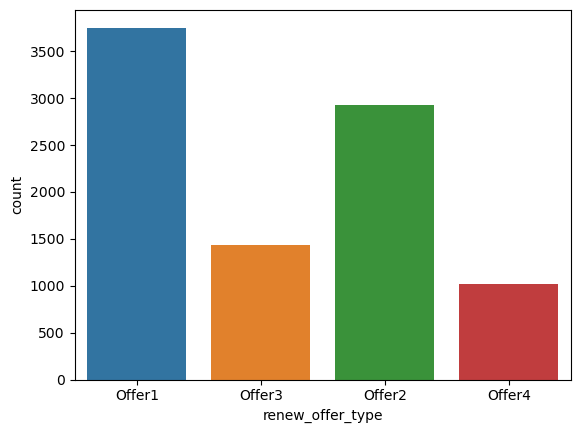

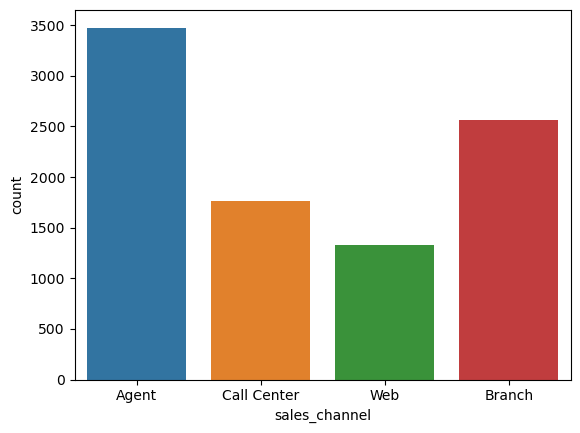

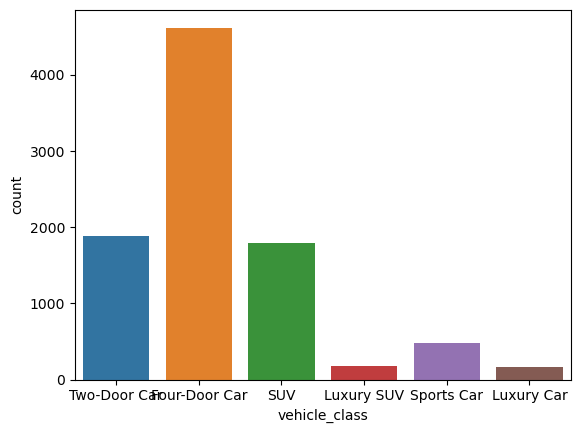

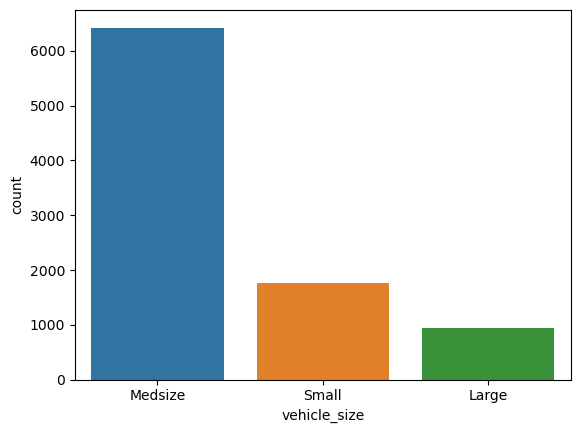

In [38]:
#Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

#Check all unique values of columns.
def cntplot_cat(df):
    for col in df.columns:
        sns.countplot(x=df[col])
        plt.show()
    return None
   

cntplot_cat(categorical_df1)

In [39]:
categorical_df1['state'].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

In [40]:
#Check all unique values of columns.
for col in categorical_df1:
    print(len(categorical_df1[col].unique()))

5
2
3
5
5
2
3
3
3
4
4
6
3


In [41]:
#we are going the make some changes in the data :
#in 'employment status' : we are grouping medical leaves, disabled and retires to a category 'other'
#'renew_offer_type : changing the numerical values into a categorical value
#vehicule_class : we group 'luxury SUV', 'Sports' and 'Luxury cars' into a 'premium' category
#policy_type : we remove 'auto'  from the values in that column

In [42]:
#removing auto from policty type
categorical_df1['policy_type'] = categorical_df1['policy_type'].str.replace('Auto', '')
categorical_df1

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal,Offer3,Branch,Four-Door Car,Large


In [43]:
#renew_offer_type // Alphanumeric to categorical
categorical_df1['renew_offer_type'] = categorical_df1['renew_offer_type'].str.replace('1', 'A')
categorical_df1['renew_offer_type'] = categorical_df1['renew_offer_type'].str.replace('2', 'B')
categorical_df1['renew_offer_type'] = categorical_df1['renew_offer_type'].str.replace('3', 'C')
categorical_df1['renew_offer_type'] = categorical_df1['renew_offer_type'].str.replace('4', 'D')
categorical_df1

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate,OfferA,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal,OfferC,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal,OfferA,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate,OfferA,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal,OfferA,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal,OfferB,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate,OfferA,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate,OfferA,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal,OfferC,Branch,Four-Door Car,Large


In [44]:
#in 'employment status' : we are grouping medical leaves, disabled and retires to a category 'other'
categorical_df1['employmentstatus'].value_counts()


Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

In [45]:
categorical_df1['employmentstatus'] = categorical_df1['employmentstatus'].fillna('Other')
categorical_df1['employmentstatus'] = np.where(categorical_df1['employmentstatus'].isin(['Medical Leave','Disabled','Retired']) , 'Other', categorical_df1['employmentstatus'])
categorical_df1['employmentstatus'].value_counts()

Employed      5698
Unemployed    2317
Other         1119
Name: employmentstatus, dtype: int64

In [46]:
#vehicule_class : we group 'luxury SUV', 'Sports' and 'Luxury cars' into a 'premium' category
categorical_df1['vehicle_class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

In [47]:
categorical_df1['vehicle_class'] = categorical_df1['vehicle_class'].fillna('Premium')
categorical_df1['vehicle_class'] = np.where(categorical_df1['vehicle_class'].isin(['Luxury SUV','Luxury Car','Sports Car']) , 'Premium', categorical_df1['vehicle_class'])
categorical_df1['vehicle_class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Premium           831
Name: vehicle_class, dtype: int64

In [48]:
# We clean education
categorical_df1["education"] = np.where(categorical_df1.education.isin(['High School or Below']),'pre_college', categorical_df1.education)
# categorical_df.head(25)
def educ(x):
    if 'Master' in x:
        return 'College'
    elif 'Doctor' in x:
        return 'College'
    # elif 'High School or Below':
    #     return 'pre_college'
    else:
        return x
categorical_df1['education'] = list(map(educ,categorical_df1['education']))
display(categorical_df1.head(50))

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate,OfferA,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal,OfferC,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal,OfferA,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate,OfferA,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal,OfferA,Agent,Four-Door Car,Medsize
5,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,Personal,OfferB,Web,Two-Door Car,Medsize
6,Oregon,Yes,Basic,College,Employed,F,Suburban,Married,Corporate,OfferA,Agent,Four-Door Car,Medsize
7,Arizona,No,Premium,College,Unemployed,M,Urban,Single,Corporate,OfferA,Agent,Four-Door Car,Medsize
8,Oregon,Yes,Basic,Bachelor,Other,M,Suburban,Divorced,Corporate,OfferA,Agent,Four-Door Car,Medsize
9,Oregon,No,Extended,College,Employed,F,Urban,Married,Special,OfferB,Branch,Four-Door Car,Medsize


In [49]:
#we check our data again:

#Check all unique values of columns.
for col in categorical_df1:
    print(len(categorical_df1[col].unique()))

5
2
3
3
3
2
3
3
3
4
4
4
3


In [50]:
#Open the categoricals variable we created before.
categorical_df1.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate,OfferA,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal,OfferC,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal,OfferA,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate,OfferA,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal,OfferA,Agent,Four-Door Car,Medsize


In [51]:
categoricals = categorical_df1.select_dtypes(np.object)
categoricals.head()

/var/folders/y5/7v3j89sd4ps24p3x50lkvwf80000gn/T/ipykernel_6165/779758675.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = categorical_df1.select_dtypes(np.object)


,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate,OfferA,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal,OfferC,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal,OfferA,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate,OfferA,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal,OfferA,Agent,Four-Door Car,Medsize


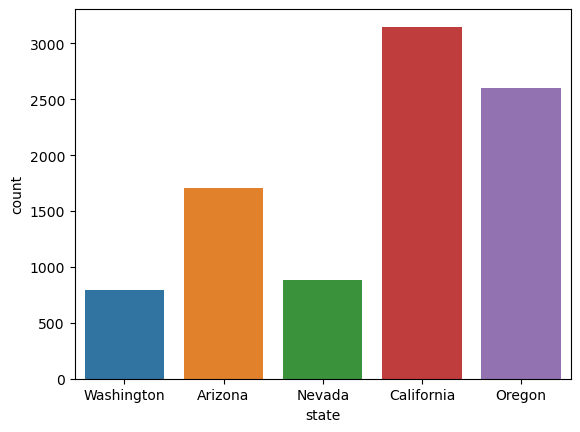

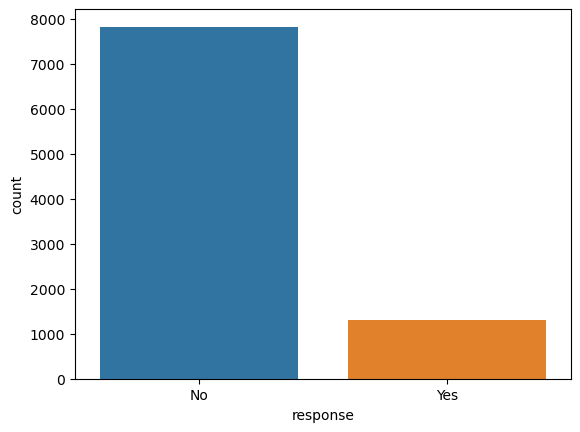

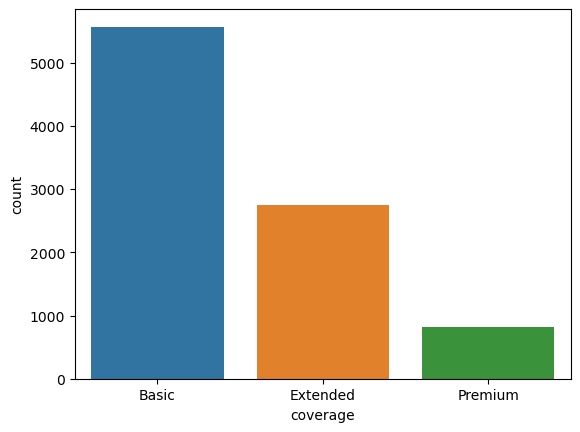

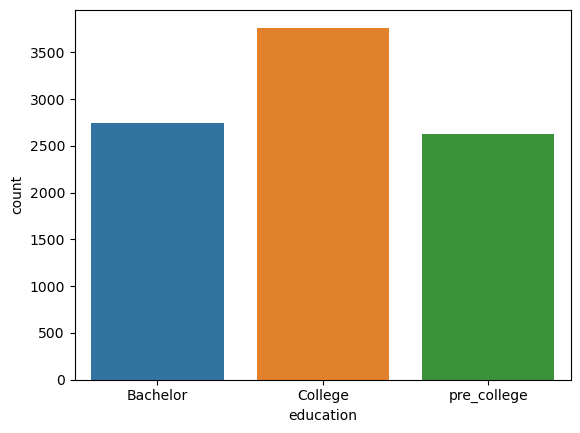

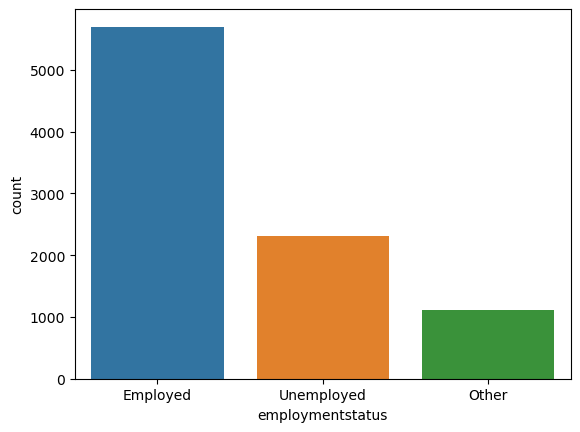

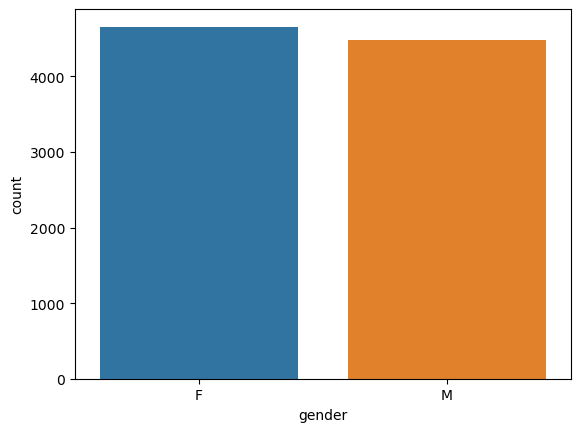

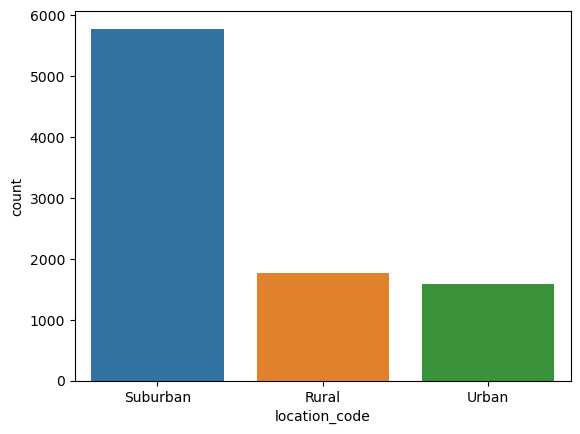

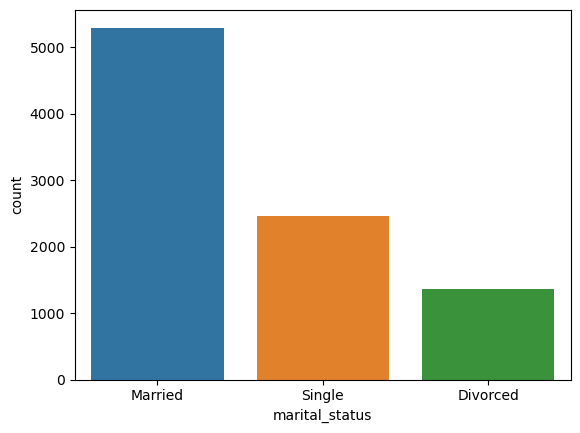

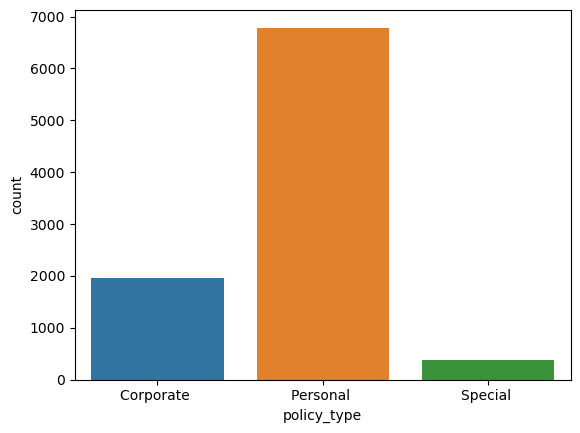

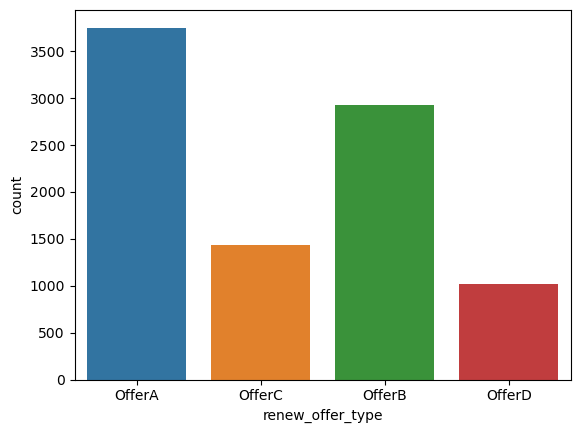

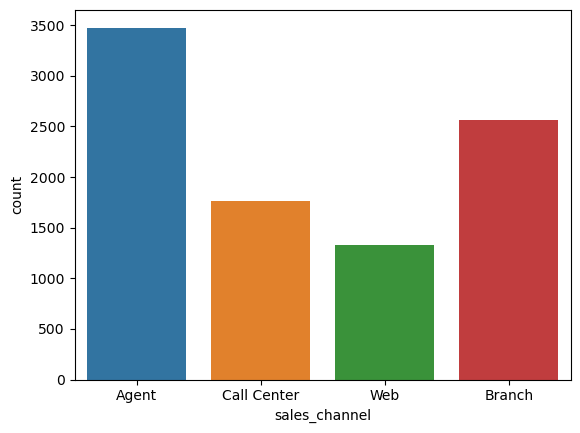

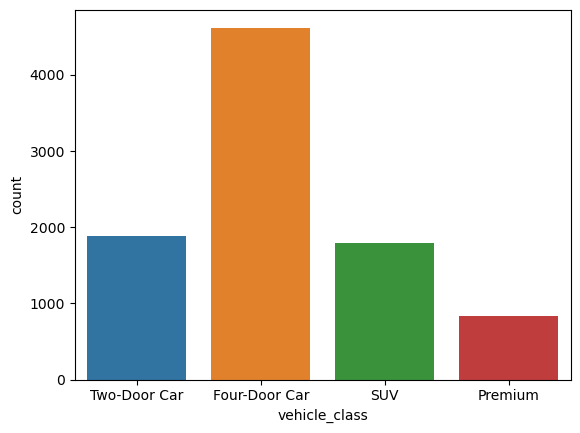

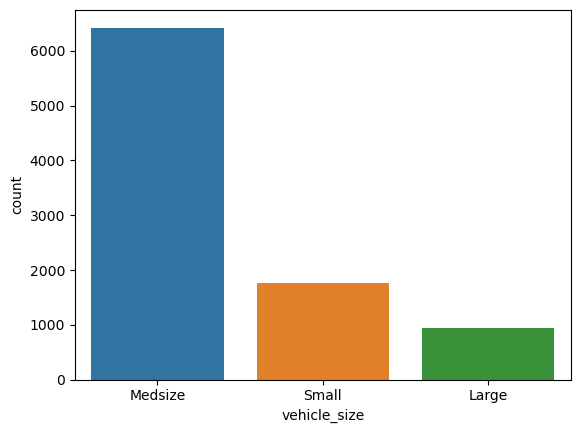

In [52]:
#Plot all the categorical variables with the proper plot. What can you see?
def cntplot_cat(df):
    for col in df.columns:
        sns.countplot(x=df[col])
        plt.show()
    return None
   

cntplot_cat(categoricals)

In [53]:
#There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
#We already dropped policy because it doesn´t provide us with new information and keeping policy type.

In [54]:
#Plot time variable. Can you extract something from it?

In [58]:
#We will start with removing outliers, if you have not already done so. 
#We have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

data1 = data[data['customer_lifetime_value']<70000]
data1 = data[data['monthly_premium_auto']<200]
data1 = data[data['total_claim_amount']<2500]
data1.shape

#Create a copy of the dataframe for the data wrangling.
data2 = data1.copy()

In [ ]:
#Import sklearn train_test_split and separate the data.

X = data1.drop("total_claim_amount", axis=1)
y = data1["total_claim_amount"]




#The time variable can be useful. Try to transform its data into a useful one. Hint: 
#Day week and month as integers might be useful.


In [59]:
X_num=X.select_dtypes(np.number)
X_cat=X.select_dtypes(object)

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)


from sklearn.preprocessing import MinMaxScaler

MinMaxtransformer = MinMaxScaler().fit(X_num)
X_normalized = MinMaxtransformer.transform(X_num)
print(X_normalized.shape)
X_normalized = pd.DataFrame(X_normalized,columns=X_num.columns)
X_normalized.head()


#Normalize the continuous variables. You can use any one method you want.



#Encode the categorical variables (See the hint below for encoding categorical data!!!)



#Since the model will only accept numerical data, check and make sure that every column is numerical, 
#if some are not, change it using encoding.

(9131, 7)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000


In [61]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from seaborn import load_dataset


encoder = OneHotEncoder(drop='first').fit(X_cat)

In [62]:
encoded_for_p = encoder.transform(X_cat).toarray()
encoded_for_p
cols = encoder.get_feature_names_out(input_features=X_cat.columns)
cols
onehot_encoded_for_p = pd.DataFrame(encoded_for_p, columns=cols)
onehot_encoded_for_p.head()

,customer_AA11235,customer_AA16582,customer_AA30683,customer_AA34092,customer_AA35519,customer_AA56476,customer_AA69265,customer_AA71604,customer_AA93585,customer_AB13432,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [63]:
X_train_transformed = np.concatenate([X_normalized, onehot_encoded_for_p], axis=1)

In [64]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs', 
                  multi_class='multinomial').fit(X_train_transformed, onehot_encoded_for_p)

ValueError: y should be a 1d array, got an array of shape (9131, 9173) instead.

In [65]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train_transformed)
r2_score(y_train, predictions)

NameError: name 'lm' is not defined

In [ ]:
#Try a simple linear regression with all the data to see whether we are getting good results.

#Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

#Use the function to check LinearRegressor and KNeighborsRegressor.

#You can check also the MLPRegressor for this task!

#Check and discuss the results.